# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [10]:
import pandas as pd
import numpy as np

In [11]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/home/xternava/Documents/GitHub/Incremental-build/data/'
#path = '/src/data/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Branch,Option,Build Time,bt_user,bt_sys,Binary Size
0,icurl-00001-00006,"['--disable-shared', '--disable-silent-rules',...",1.3287,0.0000,0.0008,4898824
1,icurl-00001-00015,"['--disable-shared', '--disable-largefile', '-...",20.5364,0.0000,0.0008,4898824
2,icurl-00001-00012,"['--disable-shared', '--disable-largefile', '-...",1.1020,0.0000,0.0009,4898824
3,icurl-00001-00014,"['--disable-shared', '--disable-largefile', '-...",39.1276,0.0000,0.0010,4898824
4,icurl-00001-00005,"['--disable-shared', '--disable-debug', '--dis...",0.0674,0.0000,0.0010,4898824
...,...,...,...,...,...,...
375,icurl-00020-00016,"['--disable-shared', '--disable-largefile', '-...",1.2689,0.0001,0.0010,4208096
376,icurl-00020-00013,"['--disable-shared', '--disable-largefile', '-...",38.8027,0.0000,0.0010,2741048
377,icurl-00020-00018,"['--disable-shared', '--disable-largefile', '-...",0.2834,0.0001,0.0009,4208096
378,icurl-00020-00003,"['--disable-shared', '--disable-largefile', '-...",30.3848,0.0009,0.0001,644608


In [12]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")
df = df_setindex[['Br1', 'Branch', 'Build Time', 'Binary Size']]

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Br1,Branch,Build Time,Binary Size
Br2,,,,
00001,00012,icurl-00012-00001,0.2312,855600
00001,00004,icurl-00004-00001,0.2878,4356640
00001,00002,icurl-00002-00001,0.2810,3669216
00001,00005,icurl-00005-00001,0.0581,1067672
00001,00006,icurl-00006-00001,0.0574,4516392
...,...,...,...,...
00020,00005,icurl-00005-00020,31.1565,1067672
00020,00003,icurl-00003-00020,58.6185,4208096
00020,00019,icurl-00019-00020,59.4254,4208096


In [13]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt2.unstack()

Build Time                                                        \
Br1        00001    00002    00003    00004    00005    00006    00007   
Br2                                                                      
00001        NaN   0.2810   0.2341   0.2878   0.0581   0.0574   0.3001   
00002    21.7388      NaN  40.7788  41.4188  21.6756  21.8829  40.9454   
00003     0.1102  29.9216      NaN  30.3691   0.1117   0.1115  30.1275   
00004    21.6758  42.0359  41.6964      NaN  21.7035  21.8171  41.8785   
00005     0.0674   0.3232   0.2719   0.3542      NaN   0.0659   0.3465   
00006     1.3287   1.2801   1.2540   1.2640   1.2192      NaN   1.2657   
00007     0.1230  20.5826  20.5198  20.7707   0.1203   0.1205      NaN   
00008     0.0585   0.3502   0.2710   0.3359   0.0567   0.0571   0.3362   
00009     0.0694   0.0660   0.0654   0.0710   0.0654   0.0757   0.0682   
00010     0.1111  20.8398  20.7706  21.0438   0.1113   0.1131  20.8280   
00011    28.9446  56.8255  56.4180  57.1851  28.9372  29.0973  56.6819   
00012     1.1020  24.0787  23.9887  24.4180   1.0898   1.0879  24.0633   
00013    19.9428  38.4115  38.2132  38.8658  19.9320  20.0312  38.4499   
00014    39.1276  73.7952  73.5173  74.3664  38.9953  39.1640  73.7447   
00015    20.5364  39.5390  39.3250  39.9981  20.5014  20.8316  39.6344   
00016    22.3640   1.2677  22.5275   1.2711  22.3523  22.4382  22.7096   
00017     0.1306  27.6129  27.2853  27.6256   0.1197   0.1228  27.5220   
00018     0.0578   0.2702   0.2319   0.2751   0.0570   0.0747   0.3173   
00019     1.0895  18.2467  18.1201  18.4441   1.0811   1.1003  18.2456   
00020    31.0662  58.5468  58.6185  58.6734  31.1565  31.1838  58.5154   

                                                                               \
Br1      00008    00009    00010    00011    00012    00013    00014    00015   
Br2                                                                             
00001   0.0584   0.0573   0.2868   0.2903   0.2312   0.2637   0.2827   0.2756   
00002  21.9084  21.8126  41.1097  41.0599  40.7768  40.9367  41.1319  41.0083   
00003   0.1222   0.1110  30.0947  30.1412  30.0447  30.1886  30.1418  30.3003   
00004  21.7959  21.6354  41.9808  42.1037  41.9196  41.9089  42.0489  42.0860   
00005   0.0670   0.0647   0.3323   0.3270   0.2786   0.3057   0.3301   0.3203   
00006   1.2628   1.2083   1.2779   1.2586   1.2504   1.2256   1.2661   1.2737   
00007   0.1240   0.1209  20.5415  20.9146  20.5714  20.6144  20.6605  20.6582   
00008      NaN   0.0558   0.3322   0.3310   0.2814   0.3011   0.3226   0.3174   
00009   0.0669      NaN   0.0694   0.0653   0.0666   0.0686   0.0671   0.0677   
00010   0.1111   0.1127      NaN  20.8962  20.8089  20.8914  20.8552  20.9481   
00011  29.2004  28.8960  56.6351      NaN  56.7045  56.4171  56.7764  56.9195   
00012   1.1048   1.1134  24.1090  24.1366      NaN  24.1013  24.1136  24.1402   
00013  20.0558  19.9448  38.4677  38.4679  38.3042      NaN  38.4682  38.4612   
00014  39.2449  39.1290  74.0234  73.8640  73.6186  73.7197      NaN  73.8677   
00015  20.7170  20.6163  39.7463  39.6831  39.5548  39.5931  39.6658      NaN   
00016  22.4533  22.4158  22.6853   1.0688  22.5497   1.2410   1.2590   1.2629   
00017   0.1215   0.1205  27.4176  27.5807  27.4208  27.5075  27.6033  27.5948   
00018   0.0601   0.0570   0.2883   0.2685   0.2431   0.0566   0.2765   0.2819   
00019   1.0763   1.0943  18.3445  18.2920  18.2755  18.2856  18.3182  18.3526   
00020  31.4838  31.2982  58.4700  58.7234  58.5411  58.5662  58.6921  58.7117   

                                                   
Br1     00016    00017    00018    00019    00020  
Br2                                                
00001  0.0590   0.2926   0.0660   0.0573   0.2873  
00002  1.1266  41.1249  21.9674  40.7723  41.3918  
00003  0.1143  30.2261   0.1123  29.9429  30.3848  
00004  0.1156  41.9252  22.2622  42.2259  42.0752  
00005  0.0692   0.3522   0.0655   0.2857   0.3368  
00006  1.2493   1.2664 

In [14]:
# A detailed view of each executable's binary size after incremebtal build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00002   4898824.0        NaN  3457816.0  3669216.0  1067672.0  4516392.0   
00003   4898824.0   644608.0        NaN   644608.0  1067672.0  4516392.0   
00004   4898824.0  4356640.0  4136632.0        NaN  1067672.0  4516392.0   
00005   4898824.0  3669216.0   644608.0  4356640.0        NaN  4516392.0   
00006   4898824.0  3669216.0   667784.0  4356640.0  1067672.0        NaN   
00007   4898824.0  4292872.0  4292872.0  4292872.0  1067672.0  4516392.0   
00008   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00009   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00010   4898824.0  4521984.0  4301976.0  4521984.0  1067672.0  4516392.0   
00011   4898824.0  4493712.0  4268128.0  4493712.0  1067672.0  4516392.0   
00012   4898824.0   855600.0   646704.0   855600.0  1067672.0  4516392.0   
00013   4898824.0  2741048.0  2741048.0  2741048.0  1067672.0  4516392.0   
00014   4898824.0  4759672.0  4529984.0  4759672.0  1067672.0  4516392.0   
00015   4898824.0  3637952.0  3426560.0  3637952.0  1067672.0  4516392.0   
00016   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00017   4898824.0  4670072.0  4450064.0  4670072.0  1067672.0  4516392.0   
00018   4898824.0  3669216.0   644608.0  4356640.0  1067672.0  4516392.0   
00019   4898824.0  1149776.0   940880.0  1149776.0  1067672.0  4516392.0   
00020   4898824.0  4208096.0  4208096.0  4208096.0  1067672.0  4516392.0   

                                                                        \
Br1        00007      00008     00009      00010      00011      00012   
Br2                                                                      
00001  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00002  3457816.0  4783008.0  784552.0  3669216.0  3669216.0  3669216.0   
00003   644608.0  4783008.0  784552.0   644608.0   644608.0   644608.0   
00004  4136632.0  4783008.0  784552.0  4356640.0  4356640.0  4356640.0   
00005  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00006  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00007        NaN  4783008.0  784552.0  4292872.0  4292872.0  4292872.0   
00008  4292872.0        NaN  784552.0  4521984.0  4493712.0   855600.0   
00009  4292872.0  4783008.0       NaN  4521984.0  4493712.0   855600.0   
00010  4301976.0  4783008.0  784552.0        NaN  4521984.0  4521984.0   
00011  4268128.0  4783008.0  784552.0  4493712.0        NaN  4493712.0   
00012   646704.0  4783008.0  784552.0   855600.0   855600.0        NaN   
00013  2741048.0  4783008.0  784552.0  2741048.0  2741048.0  2741048.0   
00014  4529984.0  4783008.0  784552.0  4759672.0  4759672.0  4759672.0   
00015  3426560.0  4783008.0  784552.0  3637952.0  3637952.0  3637952.0   
00016  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00017  4450064.0  4783008.0  784552.0  4670072.0  4670072.0  4670072.0   
00018  4292872.0  4783008.0  784552.0  4521984.0  4493712.0   855600.0   
00019   940880.0  4783008.0  784552.0  1149776.0  1149776.0  1149776.0   
00020  4208096.0  4783008.0  784552.0  4208096.0  4208096.0  4208096.0   

                                                                        \
Br1        00013      00014      00015      00016      00017     00018   
Br2                                                                      
00001  2741048.0  4759672.0  3637952.0  4077664.0  4670072.0  723024.0   
00002  3457816.0  3669216.0  3669216.0  4077664.0  3669216.0  723024.0   
00003   644608.0   644608.0   644608.0  4077664.0   644608.0  723024.0   
00004  4136632.0  4356640.0  4356640.0  4077664.0  4356640.0  723024.0   
00005  2741048.0  4759672.0  3637952

In [15]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = "Br2", 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=["max", "mean", "min"],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,0.3001,0.196142,0.0573
00002,41.4188,32.871979,1.1266
00003,30.3848,19.088237,0.1102
00004,42.2259,33.415289,0.1156
00005,0.3542,0.240221,0.0647
00006,1.3287,1.256889,1.2083
00007,20.9146,13.101184,0.1203
00008,0.3587,0.236353,0.0558


In [16]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00006,1.3287,1.256889,1.2083
00002,41.4188,32.871979,1.1266
00014,75.0104,59.117132,1.1191
00020,59.4254,47.025500,1.1074
00019,18.4441,11.962637,1.0763
00012,24.4180,15.646684,1.0747
00016,22.7096,14.673021,1.0688
00015,39.9981,31.589837,0.3751


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

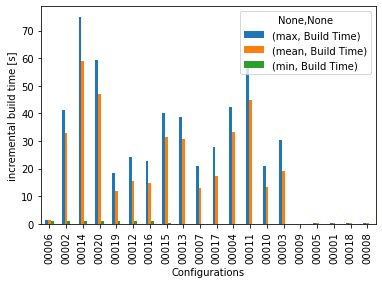

In [17]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

#ib_plot.tight_layout(pad=1.0)
plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

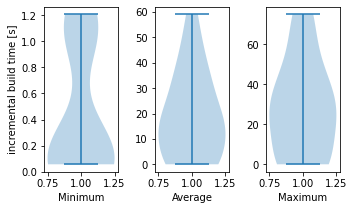

In [18]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()